In [1]:
import numpy as np 
import torch
import torch.nn as nn 
import matplotlib.pyplot as plt 
from IPython import display
display.set_matplotlib_formats('svg')
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

%matplotlib inline

import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

C:\Users\mansu\AppData\Local\Temp\ipykernel_14456\4207866408.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


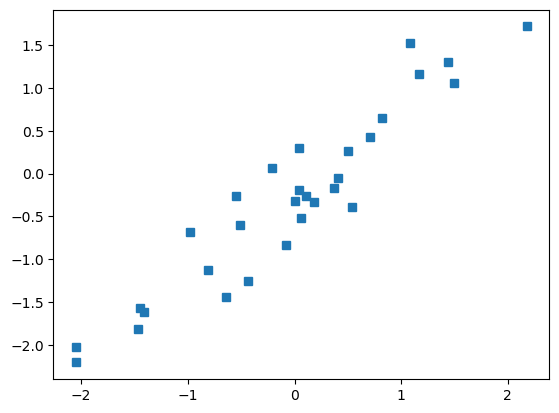

In [5]:
#create data

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

# plot that 
plt.plot(x,y,'s')
plt.show()

In [6]:
ANNreg = nn.Sequential(
    nn.Linear(1,1), # input layer
    nn.ReLU(),      # activation function
    nn.Linear(1,1)  # output layer
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [7]:
# learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

# optimizer ( the flavor of gradient descent to implement)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)

<h1>Train the model</h1>

In [13]:
# Train the model
numepochs = 500
losses = torch.zeros(numepochs)

## Train the model
for epochi in range(numepochs):

    # forward pass
    yHat = ANNreg(x)

    # compute loss
    loss = lossfun(yHat , y)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

<h1>show the losses


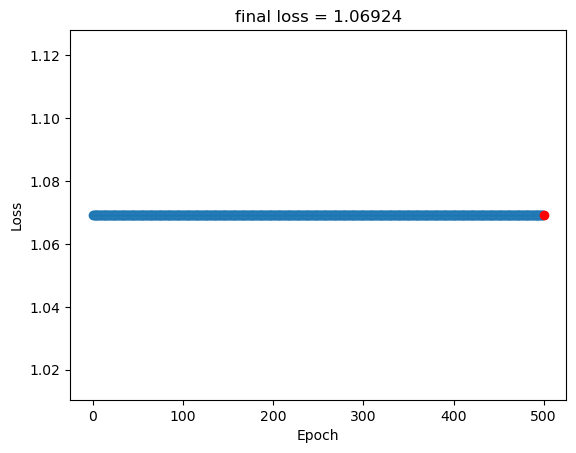

In [16]:
# manually compute losses
# final forward pass
predictions = ANNreg(x)

# final loss ( MSE)
testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w' , linewidth=.1)
plt.plot(numepochs , testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('final loss = %g' %testloss.item())
plt.show()